In [1]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd 

In [2]:
data_set= pd.read_csv(r'Salary_dataset.csv') 
print(data_set.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [3]:
data_set=data_set.drop(columns='Unnamed: 0')

In [4]:
data_set.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [5]:
data_set.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
data_set.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [8]:
x= data_set.iloc[:, :-1].values
y= data_set.iloc[:, -1].values 
print(x)
print(y)

[[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]
[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


In [9]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

In [10]:
x_train

array([[ 3. ],
       [ 5.2],
       [ 3.3],
       [ 4.6],
       [ 8.3],
       [ 6.9],
       [ 1.4],
       [10.6],
       [ 3.1],
       [ 2.3],
       [ 6. ],
       [ 6.1],
       [ 3.8],
       [ 3.3],
       [ 9.1],
       [ 2.1],
       [ 1.2],
       [ 7.2],
       [ 5. ],
       [ 4.1]])

In [11]:
x_test

array([[ 1.6],
       [10.4],
       [ 4.2],
       [ 4. ],
       [ 9.6],
       [ 8.8],
       [ 9.7],
       [ 4.1],
       [ 5.4],
       [ 8. ]])

In [9]:
y_train

array([ 56643.,  66030.,  64446.,  61112., 113813.,  91739.,  46206.,
       121873.,  60151.,  39892.,  81364.,  93941.,  57190.,  54446.,
       105583.,  43526.,  39344.,  98274.,  67939.,  56958.])

In [10]:
y_test

array([ 37732., 122392.,  57082.,  63219., 116970., 109432., 112636.,
        55795.,  83089., 101303.])

In [12]:
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

In [12]:
#Prediction of Test and Training set result  
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train)  

In [16]:
d=regressor.predict([[20]])
d

array([212801.44686217])

In [14]:
r_sq = regressor.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {regressor.intercept_}")
print(f"slope: {regressor.coef_}")

coefficient of determination: 0.9565349708076958
intercept: 25882.59799971892
slope: [9345.94244312]


In [15]:
x_pred

array([ 53920.42532909,  74481.49870396,  56724.20806202,  68873.93323808,
       103453.92027763,  90369.60085726,  38966.91742009, 124949.58789682,
        54855.0195734 ,  47378.2656189 ,  81958.25265845,  82892.84690277,
        61397.17928358,  56724.20806202, 110930.67423213,  45509.07713028,
        37097.72893147,  93173.3835902 ,  72612.31021533,  64200.96201652])

In [16]:
y_pred

array([ 40836.10590871, 123080.39940819,  65135.55626083,  63266.36777221,
       115603.64545369, 108126.8914992 , 116538.23969801,  64200.96201652,
        76350.68719258, 100650.1375447 ])

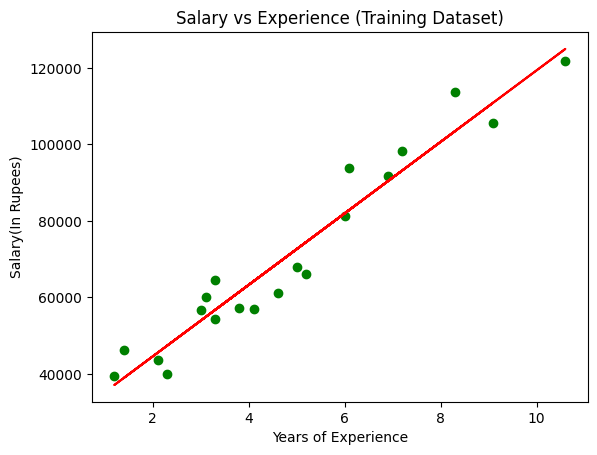

In [17]:
mtp.scatter(x_train, y_train, color="green")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("Salary vs Experience (Training Dataset)")  
mtp.xlabel("Years of Experience")  
mtp.ylabel("Salary(In Rupees)")  
mtp.show() 

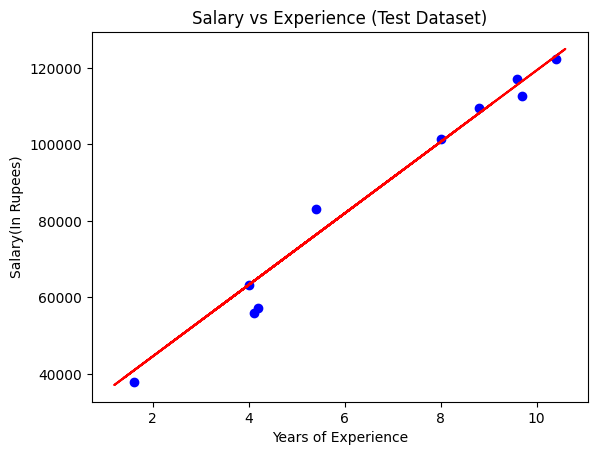

In [18]:
#visualizing the Test set results  
mtp.scatter(x_test, y_test, color="blue")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("Salary vs Experience (Test Dataset)")  
mtp.xlabel("Years of Experience")  
mtp.ylabel("Salary(In Rupees)")  
mtp.show()  

### Multiple Linear Regression

In [22]:
# importing libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Reading the dataset
dataset = pd.read_csv("advertising.csv")

In [25]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [26]:
#Extracting Independent and dependent Variable  
#Setting the value for X and Y
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [28]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [29]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  4.334595861728431
Coefficients:


[('TV', 0.053829108667250075),
 ('Radio', 0.11001224388558056),
 ('Newspaper', 0.006289950146130346)]

In [30]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


In [31]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
126,6.6,9.352211
104,20.7,20.963446
99,17.2,16.488511
92,19.4,20.109710
111,21.8,21.671484


In [32]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 90.11
Mean Absolute Error: 1.227818356658941
Mean Square Error: 2.6360765623280646
Root Mean Square Error: 1.6235998775338907


### Polynomial

In [34]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#importing datasets  
data_set= pd.read_csv('Position_Salaries.csv')  
  
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, 1:2].values  
y= data_set.iloc[:, 2].values  

In [35]:
#Fitting the Linear Regression to the dataset  
from sklearn.linear_model import LinearRegression  
lin_regs= LinearRegression()  
lin_regs.fit(x,y)  

LinearRegression()

In [36]:
 #Fitting the Polynomial regression to the dataset  
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 3)  
x_poly= poly_regs.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)  

LinearRegression()

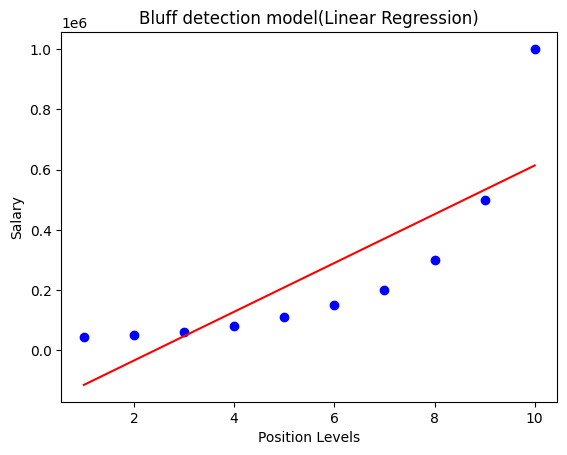

In [37]:
#Visulaizing the result for Linear Regression model  
mtp.scatter(x,y,color="blue")  
mtp.plot(x,lin_regs.predict(x), color="red")  
mtp.title("Bluff detection model(Linear Regression)")  
mtp.xlabel("Position Levels")  
mtp.ylabel("Salary")  
mtp.show()  

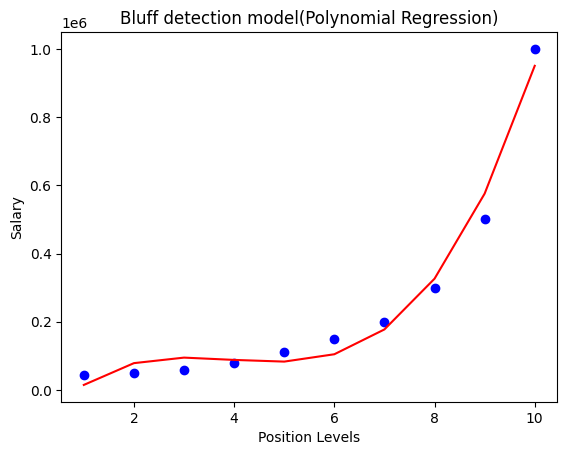

In [38]:
#Visulaizing the result for Polynomial Regression  
mtp.scatter(x,y,color="blue")  
mtp.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")  
mtp.title("Bluff detection model(Polynomial Regression)")  
mtp.xlabel("Position Levels")  
mtp.ylabel("Salary")  
mtp.show()  

In [39]:
lin_pred = lin_regs.predict([[6.5]])  
print(lin_pred)  

[330378.78787879]


In [40]:
poly_pred = lin_reg_2.predict(poly_regs.fit_transform([[6.5]]))  
print(poly_pred)  

[133259.46969697]
